## Sales Analysis

In [2]:
import pandas as pd
import os

#### Merging data from 12 months

In [3]:
df = pd.DataFrame()

for file in os.listdir(".\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"):
    df = pd.concat([df, pd.read_csv(".\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\" + file)])

df.to_csv("all_data.csv", index=False)

#### Read updated dataframe

In [4]:
data = pd.read_csv("./all_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data

In [5]:
nan = data[data.isna().any(axis=1)]
nan.head()

data = data.dropna(how="all")

data = data[data["Order Date"].str[0:2] != "Or"]

data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])

#### Add month column

In [6]:
data["Month"] = data["Order Date"].str[0:2]
data["Month"] = pd.to_numeric(data["Month"])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add sales column

In [7]:
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question: What was the best month for sales??

In [8]:
results = data.groupby("Month").sum()["Sales"]

In [9]:
import matplotlib.pyplot as plt 

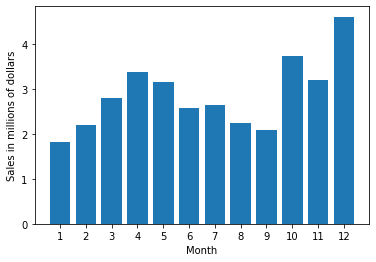

In [10]:
plt.bar(range(1, 13), [result/1e6 for result in results])
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Sales in millions of dollars")
plt.show()

### Question 2: What city had the most sales?

#### Adding the city column

In [11]:
def get_city(address):
    return address.split(", ")[1]
def get_state(address):
    return address.split(", ")[2].split(' ')[0]

data["City"] = data["Purchase Address"].apply(lambda x: f"{get_city(x)} {get_state(x)}")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Ploting data

In [12]:
results = data.groupby("City").sum()

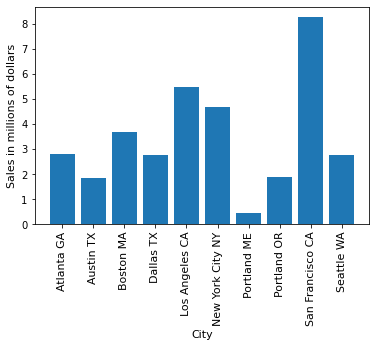

In [13]:
cities = data["City"].unique()
cities.sort()

plt.bar(cities, [result/1e6 for result in results["Sales"]])
plt.xticks(cities, rotation="vertical", size=11)
plt.xlabel("City", size=11)
plt.ylabel("Sales in millions of dollars", size=11)
plt.show()

### Question 3: What time is best for ads?

In [21]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [23]:
data["Hour"] = data["Order Date"].dt.hour
data["Minute"] = data["Order Date"].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


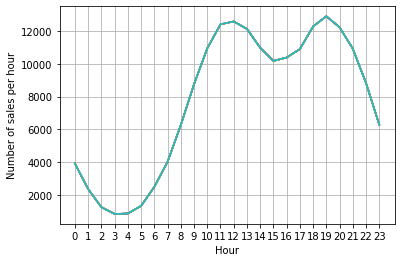

In [31]:
hours = data["Hour"].unique()
hours.sort()

plt.plot(hours, data.groupby("Hour").count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of sales per hour")
plt.grid()
plt.show()

# Best time for ads is around 11am  and 7pm

### Question 4: What items are most often sold together

In [39]:
doubles = data[data["Order ID"].duplicated(keep=False)]

doubles["Grouped"] = doubles.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
doubles = doubles[["Order ID", "Grouped"]].drop_duplicates()

doubles.head()

<ipython-input-39-c5211d8972c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doubles["Grouped"] = doubles.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
